# Analysis of E-Commerce Dataset

The dataset is downloaded from Kaggle and can be found [here](https://www.kaggle.com/datasets/utkarsharya/ecommerce-purchases)

Features Meaninngs provided for this dataset is as the following:
- 'Address' - customer's address.
- 'Browser Info' - info regarding the browser of the customer.
- 'Company' - the company in which the customer work.
- 'Credit Card' - number of the customer's credit card.
- 'CC Exp Date' - the expiray date of teh customer's credit card.
- 'CC Security Code' - the security code of the customer's credit card.
- 'CC Provider' - name of the caompany provided the credit card.
- 'Email' - customer's email.
- 'Job' - customer's job title.
- 'IP Address' - customers' IP Address.
- 'Language' - customer's language.
- 'Purchase Price' - price of the item purchased



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import lxml
from bs4 import BeautifulSoup

import scipy.stats

pd.set_option('precision',2)
pd.options.display.max_colwidth = 100

In [2]:
import plotly
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)

cf.go_offline()

import plotly.graph_objs as go

import chart_studio.plotly as py

In [3]:
data = pd.read_csv('../data/Ecommerce Purchases.csv')
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77130-7478",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2.9.183 Version/12.00,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 84355-4179",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Presto/2.9.176 Version/11.00,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.2; Trident/5.1),"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 rv:3.0; en-US) AppleWebKit/531.27.1 (KHTML, like G...","Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 57826",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2.9.182 Version/11.00,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


## Data Cleaning

In [6]:
data['Browser'] = data['Browser Info'].str.split('/').str.get(0)

Let's explore the 'Address' column

In [7]:
data['Address']

0        16629 Pace Camp Apt. 448\nAlexisborough, NE 77130-7478
1       9374 Jasmine Spurs Suite 508\nSouth John, TN 84355-4179
2                              Unit 0065 Box 5052\nDPO AP 27450
3                         7780 Julia Fords\nNew Stacy, WA 45798
4            23012 Munoz Drive Suite 337\nNew Cynthia, TX 57826
                                 ...                           
9995              966 Castaneda Locks\nWest Juliafurt, CO 96415
9996      832 Curtis Dam Suite 785\nNorth Edwardburgh, TX 55158
9997                      Unit 4434 Box 6343\nDPO AE 28026-0283
9998                       0096 English Rest\nRoystad, IA 12457
9999             40674 Barrett Stravenue\nGrimesville, WI 79682
Name: Address, Length: 10000, dtype: object

In [8]:
data['Address'].str.split('\n').str.get(1)

0       Alexisborough, NE 77130-7478
1          South John, TN 84355-4179
2                       DPO AP 27450
3                New Stacy, WA 45798
4              New Cynthia, TX 57826
                    ...             
9995        West Juliafurt, CO 96415
9996     North Edwardburgh, TX 55158
9997               DPO AE 28026-0283
9998               Roystad, IA 12457
9999           Grimesville, WI 79682
Name: Address, Length: 10000, dtype: object

It can be seen that some of the addresses has DPO abbreviation in them. Let's explore that.

In [9]:
data['Address'].str.split('\n').str.get(1).str.contains('DPO')

0       False
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997     True
9998    False
9999    False
Name: Address, Length: 10000, dtype: bool

In [10]:
data['Address'][data['Address'].str.split('\n').str.get(1).str.contains('DPO')].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(1).\
        value_counts()

AP    129
AA    127
AE    124
Name: Address, dtype: int64

I'll check if the number of rows contain AE, AA or AP is equal to those in the previous value_counts

In [11]:
print(sum(data['Address'].str.contains('AE')),
sum(data['Address'].str.contains('AA')),
sum(data['Address'].str.contains('AE')))

331 351 331


That means there are still some rows where there address contains AE, AP or AA 

After conducting an online research, it turn out that DPO stands for Diplomatic Post Office, AA stands for Armed Forces America, AE stands for Armed Forces and AP stands for Armed Forces Pacific.
[Source](https://knowledgecenter.zuora.com/BB_Introducing_Z_Business/D_Country%2C_State%2C_and_Province_Codes/B_State_Names_and_2-Digit_Codes)

Furthermore, I found that FPO and APO are used for simlar cases. 

In [12]:
# number of addresses that contain "AA"
data['Address'][data['Address'].str.contains('[DPO|APO|FPO]\sAA\s', regex=True)].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(0).\
        value_counts().sum()

351

In [13]:
# number of addresses that contain "AE"
data['Address'][data['Address'].str.contains('[DPO|APO|FPO]\sAE\s', regex=True)].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(0).\
        value_counts().sum()

331

In [14]:
# number of addresses that contain "AP"
data['Address'][data['Address'].str.contains('[DPO|APO|FPO]\sAP\s', regex=True)].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(0).\
        value_counts().sum()

376

I'll check if the address contains 'FPO' or 'APO'

In [15]:
sum(data['Address'].str.contains('FPO'))

334

In [16]:
sum(data['Address'].str.contains('APO'))

344

So, in addition to DPO in the address text, there are also FPO and APO which can be used alternatively

In [17]:
data['Address'][data['Address'].str.split('\n').str.get(1).str.contains('DPO')].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(1).\
        value_counts()

AP    129
AA    127
AE    124
Name: Address, dtype: int64

In [18]:
data['Address'][data['Address'].str.split('\n').str.get(1).str.contains('FPO')].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(1).\
        value_counts()

AP    122
AA    114
AE     98
Name: Address, dtype: int64

In [19]:
data['Address'][data['Address'].str.split('\n').str.get(1).str.contains('APO')].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(1).\
        value_counts()

AP    125
AA    110
AE    109
Name: Address, dtype: int64

I'll check if the total numbers of rows containing "AP", "AA" and "AE" in the previous 3 resutls are equal to those containing "AP", "AA" and "AE" in the dataset

In [20]:
# number of addresses that contain "AA"
data['Address'][data['Address'].str.contains('[DPO|APO|FPO]\sAP\s', regex=True)].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(0).\
        value_counts().sum()

376

In [21]:
# number of addresses that contain "AE"
data['Address'][data['Address'].str.contains('[DPO|APO|FPO]\sAA\s', regex=True)].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(0).\
        value_counts().sum()

351

In [22]:
# number of addresses that contain "AP"
data['Address'][data['Address'].str.contains('[DPO|APO|FPO]\sAE\s', regex=True)].\
        str.split('\n').\
        str.get(1).\
        str.split(' ').\
        str.get(0).\
        value_counts().sum()

331

There are equal. Mission Accomplished! Move on to the next step.

In [23]:
# establish new address columns to work with it with ease
data['Address List'] = data['Address'].str.replace('\n',', ').str.split(', ')
data['Address List']

0        [16629 Pace Camp Apt. 448, Alexisborough, NE 77130-7478]
1       [9374 Jasmine Spurs Suite 508, South John, TN 84355-4179]
2                              [Unit 0065 Box 5052, DPO AP 27450]
3                         [7780 Julia Fords, New Stacy, WA 45798]
4            [23012 Munoz Drive Suite 337, New Cynthia, TX 57826]
                                  ...                            
9995              [966 Castaneda Locks, West Juliafurt, CO 96415]
9996      [832 Curtis Dam Suite 785, North Edwardburgh, TX 55158]
9997                      [Unit 4434 Box 6343, DPO AE 28026-0283]
9998                       [0096 English Rest, Roystad, IA 12457]
9999             [40674 Barrett Stravenue, Grimesville, WI 79682]
Name: Address List, Length: 10000, dtype: object

In [24]:
# get the number of elements in the each address list
def get_address_length(x):
    return len(x)

data['Address Length'] = data['Address List'].apply(get_address_length)

data['Address Length'].value_counts()

3    9286
2     714
Name: Address Length, dtype: int64

So, the Address list contains a maximum of 3 elements

In [25]:
data.drop('Address Length', axis=1, inplace=True)

In [26]:
def get_country(x):
    if len(x) > 2:
        return 'United States of America'
    
def get_state(x):
    if (len(x) > 2) and  (x[2].split(' ')[0]!= 'APO') and  (x[2].split(' ')[0]!='DPO') and  (x[2].split(' ')[0]!='FPO'):
        return x[2].split(' ')[0]

In [27]:
# assign the 'Country' values for rows with the addresses without 'DPO', 'APO' or 'FPO'
data['Country'] = data['Address List'].apply(get_country)
# assign the 'State' values for rows with the addresses without 'DPO', 'APO' or 'FPO'
data['State Abbreviation'] = data['Address List'].apply(get_state)


In [28]:
# assign the 'Country' values for rows with the addresses of include 'DPO', 'APO' or 'FPO'
data.loc[data['Address'].str.contains('DPO'),'Country'] = 'Diplomatic Post Offic'
data.loc[data['Address'].str.contains('FPO'),'Country'] = 'Fleet Post Office'
data.loc[data['Address'].str.contains('APO'),'Country'] = 'Army Post Office'

In [29]:
# assign the value 'AA' for the state where the address contains 'AA'
data.loc[data['Address'].str.contains('[DPO|APO|FPO]\sAA\s', regex=True),'State Abbreviation']='AA'
# assign the value 'AP' for the state where the address contains 'AP'
data.loc[data['Address'].str.contains('[DPO|APO|FPO]\sAE\s', regex=True),'State Abbreviation']='AE'
# assign the value 'AE' for the state where the address contains 'AE'
data.loc[data['Address'].str.contains('[DPO|APO|FPO]\sAP\s', regex=True),'State Abbreviation']='AP'

In [30]:
data.drop(['Address','Address List','CC Security Code'], axis=1, inplace=True)

To Change states abbreviation to states names, I'll web-scrap a table that contains the abbreviations and names of the states, then I'll join it with the data table.

In [31]:
url = 'https://knowledgecenter.zuora.com/BB_Introducing_Z_Business/D_Country%2C_State%2C_and_Province_Codes/B_State_Names_and_2-Digit_Codes'

page = requests.get(url)

soup = BeautifulSoup(page.text,'lxml')

In [32]:
table = soup.find('table',{'class':'zebra'})

In [33]:
headers = []
for i in table.find_all('th'):
    header = i.text
    headers.append(header)

In [34]:
headers

['State or Region Code', 'Name']

In [35]:
states = pd.DataFrame(columns=headers)

In [36]:
for row in table.find_all('tr')[1:]:
    table_data = row.find_all('td')
    row_data =[data_point.text.strip() for data_point in table_data]
    length = len(states)
    states.loc[length] = row_data

In [37]:
states.rename(columns = {'State or Region Code':'State Abbreviation','Name':'State'}, inplace = True)
states.head()

,State Abbreviation,State
0,AA,Armed Forces America
1,AE,Armed Forces
2,AK,Alaska
3,AL,Alabama
4,AP,Armed Forces Pacific


In [38]:
data = data.merge(states, how = 'left', left_on ='State Abbreviation', right_on='State Abbreviation')
# data.drop(['States Abbreviation'], axis=1, inplace=True)
# data.rename(columns = {'AM or PM':'Period of Day'}, inplace=True)
data.head(2)

,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Provider,Email,Job,IP Address,Language,Purchase Price,Browser,Country,State Abbreviation,State
0,46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2.9.183 Version/12.00,Martinez-Herman,6011929061123406,02/20,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Opera,United States of America,NE,Nebraska
1,28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Presto/2.9.176 Version/11.00,"Fletcher, Richards and Whitaker",3337758169645356,11/18,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Opera,United States of America,TN,Tennessee


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lot                 10000 non-null  object 
 1   AM or PM            10000 non-null  object 
 2   Browser Info        10000 non-null  object 
 3   Company             10000 non-null  object 
 4   Credit Card         10000 non-null  int64  
 5   CC Exp Date         10000 non-null  object 
 6   CC Provider         10000 non-null  object 
 7   Email               10000 non-null  object 
 8   Job                 10000 non-null  object 
 9   IP Address          10000 non-null  object 
 10  Language            10000 non-null  object 
 11  Purchase Price      10000 non-null  float64
 12  Browser             10000 non-null  object 
 13  Country             10000 non-null  object 
 14  State Abbreviation  10000 non-null  object 
 15  State               9240 non-null   object 
dtypes: fl

There are still 760 missing values in the State Column

In [40]:
data[data['State'].isna()]['State Abbreviation'].value_counts()

PW    170
MH    153
FM    149
MP    147
AS    141
Name: State Abbreviation, dtype: int64

In [41]:
# I did a  research online to discover the name of those abbreviations
data.loc[data['State Abbreviation']=='PW', 'State']='Palau'
data.loc[data['State Abbreviation']=='MH', 'State']='Marshall Islands'
data.loc[data['State Abbreviation']=='FM', 'State']='Federated States of Micronesia'
data.loc[data['State Abbreviation']=='MP', 'State']='Northern Mariana Islands'
data.loc[data['State Abbreviation']=='AS', 'State']='American Samoa'

In [42]:
data.rename(columns = {'AM or PM':'Period of Day'}, inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lot                 10000 non-null  object 
 1   Period of Day       10000 non-null  object 
 2   Browser Info        10000 non-null  object 
 3   Company             10000 non-null  object 
 4   Credit Card         10000 non-null  int64  
 5   CC Exp Date         10000 non-null  object 
 6   CC Provider         10000 non-null  object 
 7   Email               10000 non-null  object 
 8   Job                 10000 non-null  object 
 9   IP Address          10000 non-null  object 
 10  Language            10000 non-null  object 
 11  Purchase Price      10000 non-null  float64
 12  Browser             10000 non-null  object 
 13  Country             10000 non-null  object 
 14  State Abbreviation  10000 non-null  object 
 15  State               10000 non-null  object 
dtypes: fl

## Answering Specific Business Questions

### What period of the day is associated with large web traffic and what is its aevrage and total revenue?

In [44]:
display('Period of the Day by Web Traffic Percentage',
        data['Period of Day'].value_counts(normalize=True),
        'Period of the Day by Average  Revenue',
        data.groupby('Period of Day').mean()['Purchase Price'],
        'Period of the Day by Total Revenue',
        data.groupby('Period of Day').sum()['Purchase Price']
       )

'Period of the Day by Web Traffic Percentage'

PM    0.51
AM    0.49
Name: Period of Day, dtype: float64

'Period of the Day by Average  Revenue'

Period of Day
AM    50.19
PM    50.50
Name: Purchase Price, dtype: float64

'Period of the Day by Total Revenue'

Period of Day
AM    247519.87
PM    255953.15
Name: Purchase Price, dtype: float64

PM has more traffic, larger aevrage and total revenue.

### What is the most popular web browser by the customers?

In [45]:
data['Browser'].value_counts(normalize=True)

Mozilla    0.79
Opera      0.21
Name: Browser, dtype: float64

Mozilla is the msot popular browser

### Is there an association between the period of the day and the type of browser?

In [46]:
cont_table  = pd.crosstab(data['Period of Day'], data['Browser'])
cont_table

Browser,Mozilla,Opera
Period of Day,,
AM,3878,1054
PM,4046,1022


In [47]:
_, p_value, __,___ = scipy.stats.chi2_contingency(cont_table, correction = True)
if p_value <= 0.05:
    print('There is a significant evidence that there is an association between period of the day and the type of browser')
else:
    print('There is no significant evidence that there is an association between period of the day and the type of browser')

There is no significant evidence that there is an association between period of the day and the type of browser


### What are the top 10 companies by number of orders? and what are the top 10 companies by total revenue?...are the same?...and what are the emails associated with each group ?

In [48]:
top10_companies_by_orders = data['Company'].value_counts().head(10)
top10_companies_by_orders = top10_companies_by_orders.index.values
print('Top 10 Companies by Number of Orders:')
for company in top10_companies_by_orders:
    print(company)

Top 10 Companies by Number of Orders:
Brown Ltd
Smith Group
Smith PLC
Smith LLC
Williams LLC
Smith and Sons
Davis and Sons
Brown Group
Johnson LLC
Johnson Ltd


In [49]:
top10_companies_by_revenue = data.groupby('Company').sum()['Purchase Price'].sort_values(ascending=False).head(10)
top10_companies_by_revenue = top10_companies_by_revenue.index.values
print('Top 10 Countries by Revenue')
for company in top10_companies_by_revenue:
    print(company)

Top 10 Countries by Revenue
Brown Ltd
Williams LLC
Smith LLC
Smith PLC
Johnson Ltd
Smith Group
Johnson PLC
Davis and Sons
Brown Group
Brown Inc


In [50]:
print('Companies in the Top 10 by Revenue but not in the Top 10 by Number of Orders:')
for company in (set(top10_companies_by_revenue) - set(top10_companies_by_orders)):
    print(company)

Companies in the Top 10 by Revenue but not in the Top 10 by Number of Orders:
Johnson PLC
Brown Inc


In [51]:
print('Companies in the Top 10 by Number of Orders but not in Top by Revenue')
for company in (set(top10_companies_by_orders) - set(top10_companies_by_revenue)):
    print(company)

Companies in the Top 10 by Number of Orders but not in Top by Revenue
Smith and Sons
Johnson LLC


In [52]:
top10_companies_by_orders_emails = (data.loc[data['Company'].isin(top10_companies_by_orders),['Company','Email']].
                                    drop_duplicates())
print(top10_companies_by_orders_emails)

top10_companies_by_orders_emails.to_csv('../results/Emails of Top 10 Comapnies by Order.csv')

             Company                        Email
227      Smith Group         oramirez@sanchez.com
261      Brown Group  bakerjoshua@wade-butler.org
302     Williams LLC            alarson@yahoo.com
427      Smith Group  coxdiana@fuller-johnson.com
548   Smith and Sons            lmadden@gmail.com
...              ...                          ...
9660       Brown Ltd    matthewriley@sullivan.com
9707     Johnson Ltd        jonesdaniel@yahoo.com
9741       Brown Ltd    barneschristina@yahoo.com
9774       Brown Ltd       marydavidson@gmail.com
9793       Brown Ltd           mary71@hotmail.com

[120 rows x 2 columns]


In [53]:
top10_companies_by_revenue_emails = (data.loc[data['Company'].isin(top10_companies_by_revenue),['Company','Email']].
                                    drop_duplicates())
print(top10_companies_by_revenue_emails)

top10_companies_by_revenue_emails.to_csv('../results/Emails of Top 10 Comapnies by Revenue.csv')

           Company                          Email
103      Brown Inc  wtownsend@jackson-johnson.biz
151      Brown Inc   walshnicole@smith-conner.org
227    Smith Group           oramirez@sanchez.com
261    Brown Group    bakerjoshua@wade-butler.org
302   Williams LLC              alarson@yahoo.com
...            ...                            ...
9707   Johnson Ltd          jonesdaniel@yahoo.com
9729   Johnson PLC              phill@hotmail.com
9741     Brown Ltd      barneschristina@yahoo.com
9774     Brown Ltd         marydavidson@gmail.com
9793     Brown Ltd             mary71@hotmail.com

[116 rows x 2 columns]


### What are average and total revenue of the  top 10 Credit Card Providers by total revenue?

In [54]:
top10_cc_providers_by_revenue = data.groupby('CC Provider').\
                                agg({'Purchase Price':['sum','mean']})['Purchase Price'].\
                                rename(columns = {'sum':'Total Revenue','mean':'Average Revenue'}).\
                                sort_values('Total Revenue', ascending=False).\
                                head(10)

top10_cc_providers_by_revenue

,Total Revenue,Average Revenue
CC Provider,,
VISA 16 digit,85528.86,49.87
JCB 16 digit,84597.33,49.30
JCB 15 digit,44376.60,51.13
Voyager,43085.77,51.97
American Express,42865.52,50.49
Maestro,42620.78,50.38
Discover,42208.13,51.66
Mastercard,40835.10,50.04
VISA 13 digit,39976.54,51.45


### What are total and average revenue of the top 4 job titled by total revenue? Is there a significant difference in the average revenue between them?

In [55]:
top4_jobs_by_revenue = data.groupby('Job').\
                                agg({'Purchase Price':['sum','mean']})['Purchase Price'].\
                                rename(columns = {'sum':'Total Revenue','mean':'Average Revenue'}).\
                                sort_values('Total Revenue', ascending=False).\
                                reset_index().\
                                head(4)
top4_jobs_by_revenue

,Job,Total Revenue,Average Revenue
0,Dietitian,1605.30,61.74
1,Lawyer,1603.85,53.46
2,Purchasing manager,1577.97,58.44
3,"Therapist, art",1526.31,61.05


In order to verify if there is a significant difference between the top 4 jobs, I'll conduct an ANOVA Hypothesis testing.

-   $H_0: µ_1 = µ_2 = µ_3$ (the 4 population means are equal)
-   $H_1:$ At least one of the means differ

In [56]:
# establish the 4 groups
Dietitians = data.loc[data['Job']=='Dietitian','Purchase Price']
Lawyers = data.loc[data['Job']=='Lawyer','Purchase Price']
Purcahsing_managers = data.loc[data['Job']=='Purchasing manager','Purchase Price']
Therapist_art = data.loc[data['Job']=='Therapist, art','Purchase Price']

# test if the 4 groups has equal variances
f_statistic, p_value = scipy.stats.f_oneway(Dietitians,Lawyers,Purcahsing_managers,Therapist_art)

if p_value <= 0.05:
    print('There is a sginificant evidence that at least one the means of the 4 groups is un equal to the others')
    
else:
   print('There is no siginificant evidence that the means of the 4 groups are different')

There is no siginificant evidence that the means of the 4 groups are different


## What is the  type of distribution exibited in the Revenue? and what is maximum, minimum and mean revenue?

count    10000.00
mean        50.35
std         29.02
min          0.00
25%         25.15
50%         50.50
75%         75.77
max         99.99
Name: Purchase Price, dtype: float64


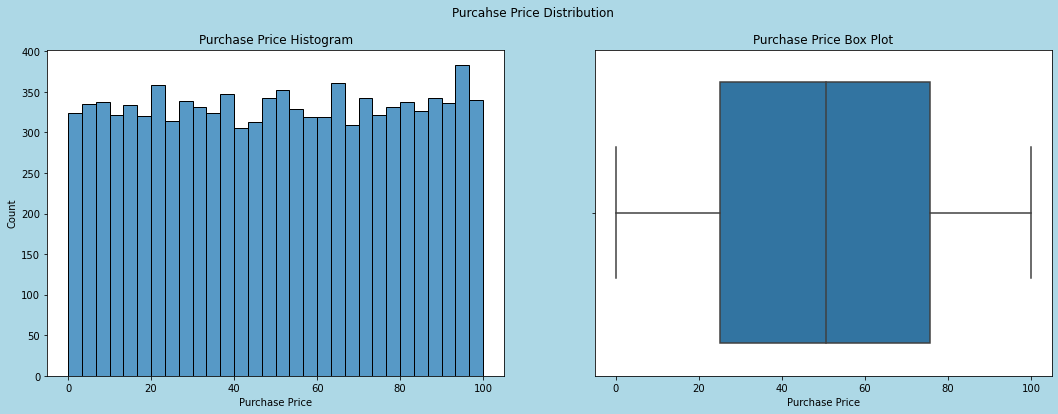

In [57]:
print(data['Purchase Price'].describe())

plt.figure(figsize = (18,6), facecolor = 'lightblue')
plt.suptitle('Purcahse Price Distribution')
plt.subplot(1,2,1)
sns.histplot(x = data['Purchase Price'], bins = 30)
plt.title('Purchase Price Histogram')
plt.subplot(1,2,2)
sns.boxplot(x = data['Purchase Price'])
plt.title('Purchase Price Box Plot')
plt.show()



- Distribution: uniform.
- Mean: 50.35.
- Maximum: 99.99.
- Minimum: 0.00


### What are the emails of the customer(s) with minimum revenue ?

In [58]:
emails = data.loc[data['Purchase Price'] == data['Purchase Price'].min(), 'Email']
print('Emails of cusomters with minimum revenue are:')
for email in emails:
    print(email)

Emails of cusomters with minimum revenue are:
jennifer11@baker.com
mjohnson@austin.org


### How many poeple have English as their language and Social rResearcher as their job ?

In [59]:
q = ((data['Language']=='en') & (data['Job'] == 'Social researcher')).sum()
print(f'There are {q} Social reseahers with English as their language')

There are 3 Social reseahers with English as their language


### What is the most popular email provider for the customer?

In [60]:
most_email_provider = data['Email'].str.split('@').str.get(1).str.split('.').str.get(0).value_counts().index[0]
print(f'Most email provider is {most_email_provider}')

Most email provider is hotmail


### Within the traditional USA main land, show the distribution of the total revenue for the top 10 states by revenue?...this can be helpful in logistics planning

In [62]:
states_revenue = data[data['Country']=='United States of America'].\
                  groupby(['State','State Abbreviation']).agg({'Purchase Price':'sum'}).\
                  reset_index().\
                  rename(columns={'Purchase Price':'Total Revenue'}).\
                  sort_values('Total Revenue', ascending=False).\
                  head(10)
states_revenue

,State,State Abbreviation,Total Revenue
16,Indiana,IN,9415.40
24,Massachusetts,MA,9394.40
27,Mississippi,MS,9070.84
11,Georgia,GA,8699.23
36,North Carolina,NC,8637.02
57,Wisconsin,WI,8509.18
18,Kansas,KS,8483.45
23,Maryland,MD,8475.41
52,Virgin Islands,VI,8304.62
19,Kentucky,KY,8292.13


In [63]:
states_revenue.iplot(kind='bar', x = 'State',y='Total Revenue',title='Revenue by USA Main-Land States',
                     xTitle='State',yTitle='Total Revenue')

In [64]:
#cf.colors.scales()

In [65]:
location_list = states_revenue['State Abbreviation'].values

In [66]:
figure_data = dict(type='choropleth',
            locations=location_list,
            locationmode='USA-states',
            colorscale='pubu',
            text = states_revenue['State'],
            colorbar={'title':'Total Revenue'},
            z = states_revenue['Total Revenue'].values
           )

In [67]:
layout = dict(title = 'Top 10 States by Total Revenue',geo={'scope':'usa'})

In [68]:
choromap = go.Figure(data=[figure_data],layout=layout)

In [69]:
iplot(choromap)

### Show the revenue by regions in the 'Country' column not in the traditional USA main land?

                 Country  Total Revenue
0  Diplomatic Post Offic       20170.40
1       Army Post Office       17451.89
2      Fleet Post Office       16425.77


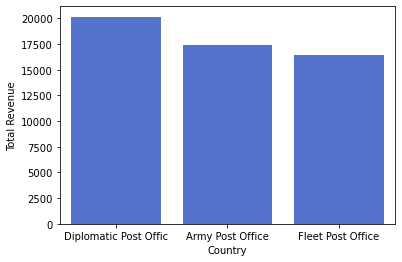

In [135]:
rev_by_non_usa_country = data[data['Country']!='United States of America'].\
                            groupby('Country').\
                            agg({'Purchase Price':'sum'}).\
                            rename(columns = {'Purchase Price':'Total Revenue'}).\
                            sort_values('Total Revenue',ascending=False).\
                            reset_index()
print(rev_by_non_usa_country)

sns.barplot(x='Country',y='Total Revenue',data=rev_by_non_usa_country, color = '#4169E1')
plt.show()